<a href="https://colab.research.google.com/github/Chris-eunkyoung-Jo/KS_DS/blob/master/probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date: 2020.05.12

Writer: Name

# Ch.6 Probability
Probability is a way of quantifying the uncertainty associated with events.
> ex) tossing a coin, rolling a die, ..., 


**Events and the Sum of Probabilites**

An Event is a set of outcomes of an experiment of the sample space. 

if the sample space is 'rolling a dice', below are an event E. 
* the dice rolls at a number. 1,2,3,4,5,6.
* the dice rolls an even number. 2 or 4 or 6 or None of them. 
* the dice rolls an odd number. 

> P(X) means 'the probability of the event X'


*Sum of probabilities in a sample space*

The sample space is consist of all possible outcomes of an event and the sum of probabilities of all is 1.0

 > $Sum(P(X)) = \sum _{i=1}^{N}P(x_{i})$  = 1.0 

For a side of number,  all possibilities are 1/6.

 1/6(1) + 1/6(2) + 1/6(3) + 1/6(4) + 1/6(5) + 1/6(6) = 1.0

For event number probabilites, 

1/2(2,4,6) +1/2(not event;1,3,5) = 1.0



In [0]:
from collections import Counter

def prob(data):
  f_data = Counter(data)  # frequencies.
  p_data = {each[0]:each[1]/len(data) for each in f_data.items()} #probabilities
  return p_data, f_data  

In [0]:
data_c = ['h','t'] *3 # 3 times of same results
#Now, it's your turn: 
p_data, f_data=prob(data_c)
print('prob. of coin flipping;', p_data)
print('freq. of coin flipping;', f_data)
sum_p = sum([each[1] for each in p_data.items()])
print(sum_p) # why sum of prob. is not 1.0?

prob. of coin flipping; {'h': 0.5, 't': 0.5}
freq. of coin flipping; Counter({'h': 3, 't': 3})
1.0


In [0]:
# a sample space of dice
data_d = [1,2,3,4,5,6] #dice

p_data, f_data=prob(data_d)  
print('freq. of dice;', f_data)
print('prob. of dice;', p_data)
sum_p = sum([each[1] for each in p_data.items()])
print(sum_p) # why sum of prob. is not 1.0? 

freq. of dice; Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1})
prob. of dice; {1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666}
0.9999999999999999


In [0]:
#mathematically, because of infinite numbers. #1=1/3+1/3+1/3=0.3333....+0.3333...+0.3333....
print('Based on a mathematical proof:1=1/3+1/3+1/3') 
print(1/3, 1/3, 1/3) # it must be 0.99999999999
print(1/3 + 1/3 + 1/3) # print() is rounded. 
# What is round()? A built-in function.
#print(round(0.99999999999999999999999))
print('Before rounding')
print(sum_p)
print('After rounding;')
print(round(sum_p)) 

Based on a mathematical proof:1=1/3+1/3+1/3
0.3333333333333333 0.3333333333333333 0.3333333333333333
1.0
Before rounding
0.9999999999999999
After rounding;
1


In [0]:
#a sample space of 9 coin flipping
data_c = ['h','h','t'] *3 # 3 times of same results
#Now, it's your turn: 
p_data, f_data=prob(data_c)
print('prob. of coin flipping;', p_data)
print('freq. of coin flipping;', f_data)
sum_p = sum([each[1] for each in p_data.items()])
print(sum_p) # why sum of prob. is not 1.0?

prob. of coin flipping; {'h': 0.6666666666666666, 't': 0.3333333333333333}
freq. of coin flipping; Counter({'h': 6, 't': 3})
1.0



***Dependence and Independence***

Two events are *dependent* if knowing whether X happens gives us information about whether Y happens.

Otherwise, they are *indepedent*. 

**Joint Probability, Conditional Probability**

Probability of two events X and Y is joint probability.    P(X, Y)

Probability of X given Y is conditional probability.    P(X|Y) 


In [0]:
def conditional_prob(p_xy, p_y): 
  return p_xy/p_y

#example : conditional prob. of the coin sample space
p_data, f_data=prob(data_c)
p_ht =p_data['h']*p_data['t']  #joint probability
p_h = p_data['h'] 
p_t = p_data['t']

#conditional prob. of tails with given heads. 
p_t_given_h = conditional_prob(p_ht, p_h)
p_h_given_t = conditional_prob(p_ht, p_t)
print(p_t_given_h)
print(p_h_given_t)

0.3333333333333333
0.6666666666666666


**Bayes's Theorem** 

We know P(Y|X). But, we don't know and want to know *P(X|Y)*. 

>P(X|Y) = P(Y|X) * P(X) / P(Y) 

This is a way of "reversing" conditional probabilities. 

In [0]:
def bayes_conditional(p_y_given_x, p_x, p_y):
  return (p_y_given_x * p_x)/p_y

In [0]:
#what is prob. of head given t when we know p(h), p(t), p(t|h)
p_h_given_t = bayes_conditional(p_t_given_h, p_h, p_t)
print(p_h_given_t)

0.6666666666666666


**When do we use bayes's theorem?**

**Example**:  Data scientists' solution rather than doctors' solution


Suppose: 
* a certain disease that affects 1 in every 10,000 people. 
* there is a test for this disease that gives the correct result 99% of the time ('diseased' if you have the disease, "nondiseased" if they don't). 


Bayes's theorem: the probability of your having disease, conditioned on testing positive is:

> P(D|T) = P(D)*P(T|D)/P(T)  

where,

* 'T' means "your test is positive". 'D' means "you have the disease"
* P(T) = P(T,D) + P(T,-D) = P(D)\*P(T|D) + P(-D)\*P(T|-D)

We know 
*   P(T|D): the prob. of diseased someone's being positive is 0.99.
*   P(D): the prob. of any person being diseased is 1/10000 = 0.0001
*   P(T|-D): the prob. of undiseased someone's being positive is 0.01   
*   P(-D) : the prob. of any peson not having the disease is 0.9999

Finally, 
P(D|T) = P(D)\*P(T|D)/( P(D)\*P(T|D) + P(-D)\*P(T|-D) ) 
       = 0.0001\*0.99/(0.99\*0.0001 + 0.9999\*0.01)
       = 0.0098

In [0]:
p_t_given_d = 0.9999999  #Is this high and fair enough?
p_d = 1/10000
print(p_t_given_d, p_d)

p_Nd=1.0 - p_d
p_t_given_Nd = 1.0 - p_t_given_d
print(p_Nd, p_t_given_Nd)
#p_d_given_t = bayes_conditional(0.99, p_d, p_t)

0.9999999 0.0001
0.9999 9.999999994736442e-08


In [0]:
#reverse inspection
p_d_given_t=p_d*p_t_given_d/(p_t_given_d*p_d + p_Nd*p_t_given_Nd)
print(p_d_given_t) # the prob. of diseseasd conditional on testing positive. 

0.009803921568627442


In [0]:
#with byaes condtional
p_t = (p_t_given_d*p_d + p_Nd*p_t_given_Nd)
p_d_given_t = bayes_conditional(p_t_given_d, p_d, p_t )
print(p_d_given_t)

0.9990010987020436


In [0]:

p_t_given_d = 0.9899999  #Is this fair enough?
p_d = 10991/51640000
print(p_t_given_d, p_d)

p_Nd=1.0 - p_d
p_t_given_Nd = 1.0 - p_t_given_d
print(p_Nd, p_t_given_Nd)
#p_d_given_t = bayes_conditional(0.99, p_d, p_t)
#reverse inspection
p_d_given_t=p_d*p_t_given_d/(p_t_given_d*p_d + p_Nd*p_t_given_Nd)
print(p_d_given_t) # the prob. of diseseasd conditional on testing positive. 

0.9899999 0.00021283888458559257
0.9997871611154144 0.010000099999999956
0.020640320966814098


**Normal Distribution; Gaussian distribution**

is a probability distribution that is symmetric about the mean(mu;μ), showing that data near the mean are more frequent in occurrence than data far from the mean, its standard deviation(sigma; σ). 

In graph form, normal distribution will appear as a bell curve. https://en.wikipedia.org/wiki/Normal_distribution


>   Normal distribution graph
>> 
 ![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/340px-Normal_Distribution_PDF.svg.png) 
 
The mean μ indicates where the bell is centered, and the standard deviation σ how 'wide' it is.  So, Normal PDF(Probability distribution function) is in formular:

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi} \sigma}}exp({-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}})}$

[-5.0, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]


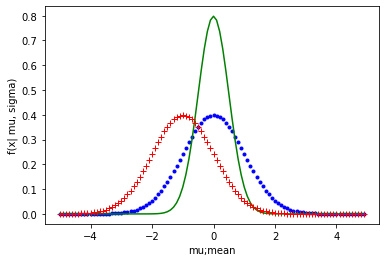

In [0]:
import math

sqrt2pi = math.sqrt(2*math.pi)

#def normal_pdf(x:float, mu:float=0, sigma:float=1) -> float:
def normal_pdf(x, mu=0.0, sigma=1.0) -> float:
  return (math.exp(-(x-mu)**2/(2*sigma**2))/(sqrt2pi*sigma))

import matplotlib.pyplot as plt
xs = [x/10.0 for x in range(-50, 50)]
print(xs)
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], 'b.', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], 'g-', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1.0) for x in xs], 'r+', label='mu=-1, sigma=1')
plt.ylabel('f(x| mu, sigma)')
plt.xlabel('mu;mean')
plt.show()